# Pawsitive Placements: Enhancing Animal Welfare through Data Analysis

Authors: Florence Thin, Michelle Lin, and Sarah Song

## Introduction

Animal adoption in shelters plays a vital role in providing loving homes for animals in need while benefiting both the adopters and the community. By choosing to adopt from shelters, individuals offer animals a second chance at life, providing them with care, love, and security. Beyond the individual act of adoption, the benefits extend to the community as well. Adoption reduces the strain on overcrowded shelters, allowing them to allocate resources effectively and rescue more animals. In our project focused on [Sonoma County Animal Services](https://sonomacounty.ca.gov/health-and-human-services/health-services/divisions/public-health/animal-services)
, we aim to analyze adoption outcomes and identify factors that contribute to successful placements. 

## Goal of Analysis

Through our analysis, we hope to shed insight on the outcomes of animals surrendered to Sonoma County Animal Services. Through careful analysis of adoption outcomes, our project aims to enhance animal welfare by identifying the factors that contribute to successful adoptions. This analysis will enable us to uncover patterns and trends that correlate with higher adoption rates, allowing us to develop effective strategies for increasing successful placements for these animals. By doing so, we hope to make a positive impact and improve the overall welfare of animals in need.

## About the Data

We retrieved the data from SoCo Data, which is an open data portal for the County of Sonoma. Here is a link to the data: https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import pickle

In [2]:
shelter_data = pd.read_csv('./data/Animal_Shelter_Data.csv')
shelter_data.shape

(25008, 24)

In [3]:
shelter_data.head(5)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,K22-043412,TRUCK,A396382,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,K23-044095,TRUCK,A416206,...,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1
2,MAX,DOG,BORDER COLLIE,BLACK/TRICOLOR,Neutered,MED,03/10/2020,K23-044090,DS80,A399488,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95472.0,"95472(38.40179, -122.82512)",1
3,NaN,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,06/26/2011,K22-043405,VET,A414520,...,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MED,07/20/2013,K23-043813,DA27,A415428,...,OVER THE COUNTER,TRANSFER,MUTTVILLE,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,94103.0,"94103(37.77672, -122.40779)",1


In [4]:
shelter_data.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count'],
      dtype='object')

## Data Exploration

### Number of Animals in the Shelter by Type

In [5]:
with open('computation_results/' + 'animal_types.pickle', 'rb') as f:
    animal_types = pickle.load(f)
animal_types

Intake Type      Type 
ADOPTION RETURN  DOG        292
                 CAT        116
                 OTHER        4
BORN HERE        CAT         16
                 OTHER        1
CONFISCATE       DOG       1456
                 CAT        245
                 OTHER      197
OS APPT          DOG          1
OWNER SURRENDER  CAT       1595
                 DOG       1414
                 OTHER      143
QUARANTINE       DOG        424
                 OTHER      277
                 CAT        118
STRAY            DOG      10223
                 CAT       6603
                 OTHER     1417
TRANSFER         DOG        258
                 CAT        161
                 OTHER       12
Name: Type, dtype: int64

### Top Breeds by Animal Type

#### Top Cat Breeds

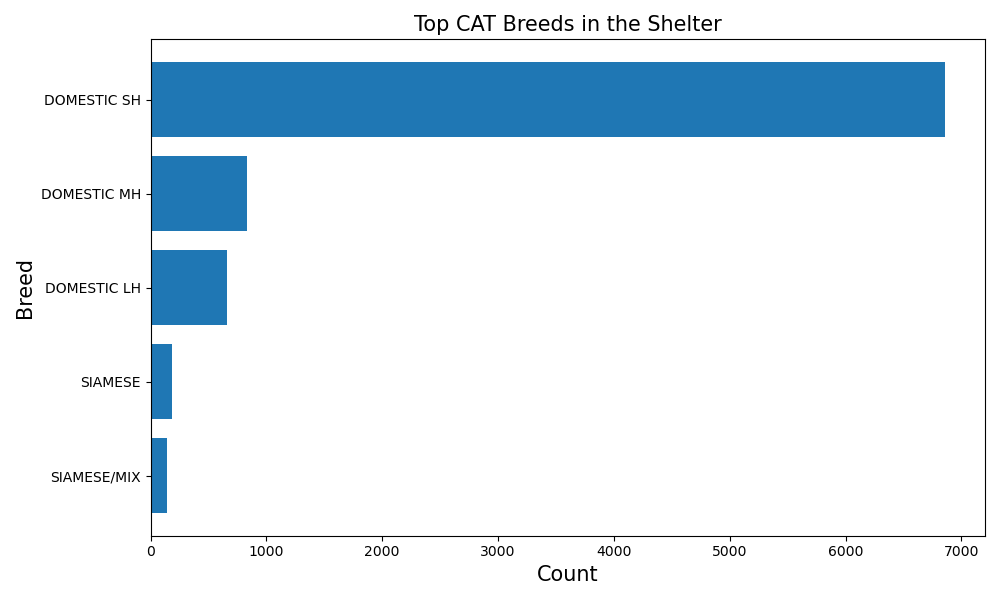

In [6]:
Image(filename = 'figures/CAT_in_the_Shelter.png', width=800, height=800)

Our analysis reveals that the dominant cat breeds at Sonoma County Animal Shelter are domestic short hair cats. This observation aligns with the geographic context of Sonoma County being situated in California, a region characterized by warm climates. The prevalence of domestic short hair cats can be attributed to their inherent ability to adapt and thrive in such conditions. 

#### Top Dog Breeds

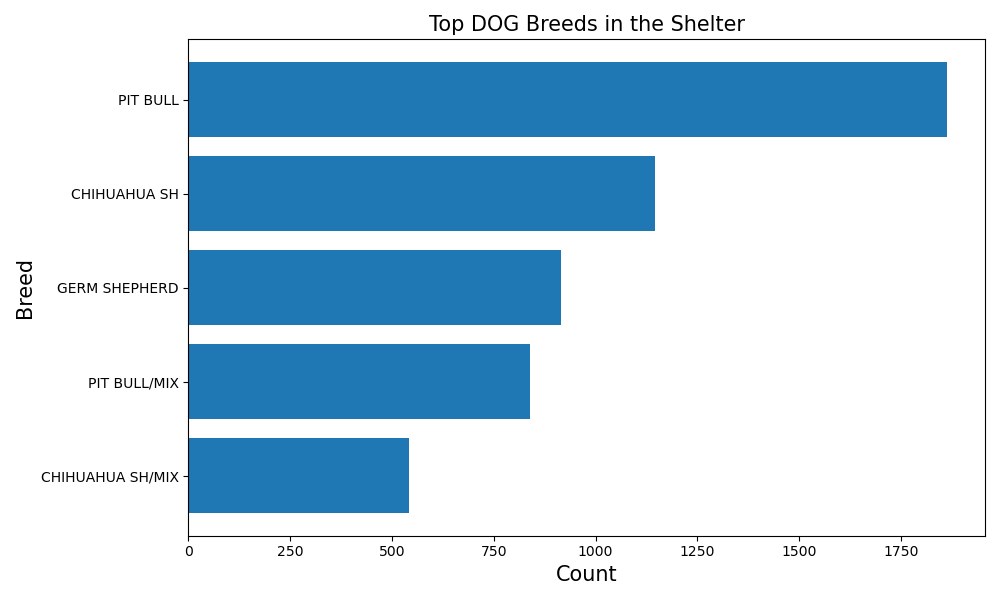

In [7]:
Image(filename = 'figures/DOG_in_the_Shelter.png', width=800, height=800)

According to our analysis, the Pit Bull breed appears to be prominently represented at the Sonoma County Animal Shelter. This observation can be influenced by the perceptions and biases associated with this breed. Pit bulls have historically encountered challenges and misconceptions due to their past associations with activities like dogfighting. 

### Trend Line: which year has the most number of animal intakes?

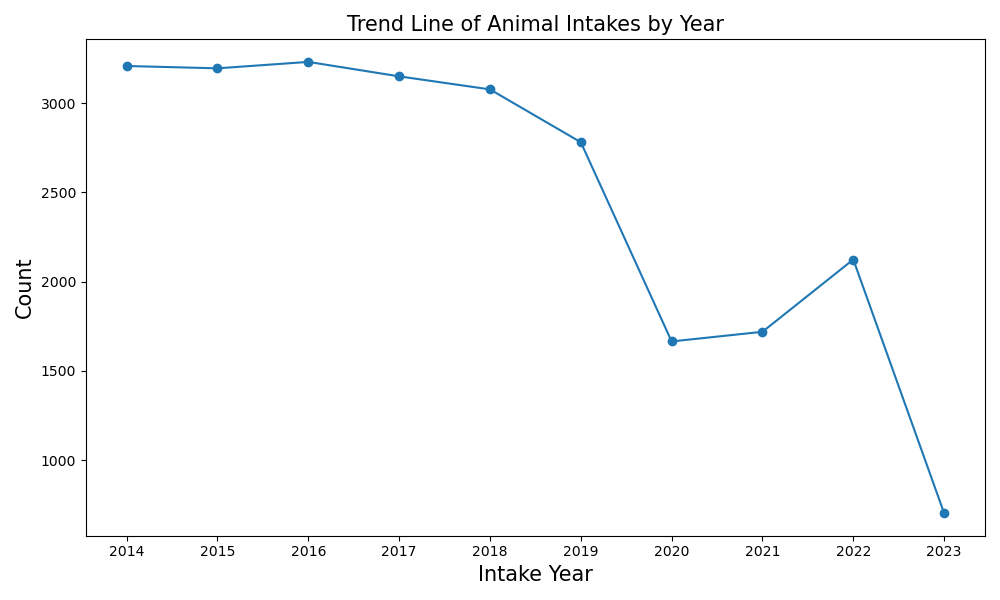

In [8]:
Image(filename = 'figures/Trend_Line_of_Animal_Intakes_by_Year.png', width=800, height=800)

The trend line analysis reveals a gradual decrease in animal intakes from 2014 to 2019, followed by a significant drop in 2020, with the count decreasing from approximately 2500 to 1700. This sharp decline can be attributed to the onset of the COVID-19 pandemic when quarantine measures were implemented, resulting in fewer animals being brought to the shelter. However, there has been a revival in intakes from 2021 to 2022, with the count increasing from around 1750 to 2200. This rise may be associated with the overall improvement in the pandemic situation as more individuals received vaccinations, leading to a decrease in COVID-19 transmission rates and restrictions. It is important to note that the dataset only includes information up until early 2023, hence the low count of animal intakes for that year. Further data beyond 2023 will provide updated insights once available.

### Outcomes By Species

The number of animals categorized by shelter intake type:

In [9]:
with open('computation_results/' + 'animal_types.pickle', 'rb') as f:
    intake_data = pickle.load(f)
intake_data

Intake Type      Type 
ADOPTION RETURN  DOG        292
                 CAT        116
                 OTHER        4
BORN HERE        CAT         16
                 OTHER        1
CONFISCATE       DOG       1456
                 CAT        245
                 OTHER      197
OS APPT          DOG          1
OWNER SURRENDER  CAT       1595
                 DOG       1414
                 OTHER      143
QUARANTINE       DOG        424
                 OTHER      277
                 CAT        118
STRAY            DOG      10223
                 CAT       6603
                 OTHER     1417
TRANSFER         DOG        258
                 CAT        161
                 OTHER       12
Name: Type, dtype: int64

The proportion of animal types within each outcome type:

In [10]:
with open('computation_results/' + 'top_outcome.pickle', 'rb') as f:
    top_outcome = pickle.load(f)
top_outcome

percent
Type  Outcome Type              
OTHER TRANSFER         42.793682
      EUTHANIZE        21.816387
      ADOPTION         21.273445
      RETURN TO OWNER   9.871668
      DIED              2.270484
      DISPOSAL          1.727542
      ESCAPED/STOLEN    0.246792
DOG   RETURN TO OWNER  50.250609
      ADOPTION         23.600172
      TRANSFER         14.556781
      EUTHANIZE        10.826292
      RTOS              0.264929
      DISPOSAL          0.250609
      DIED              0.214807
      ESCAPED/STOLEN    0.035801
CAT   ADOPTION         40.948276
      TRANSFER         26.576679
      EUTHANIZE        16.254537
      RETURN TO OWNER  13.214610
      DISPOSAL          1.780853
      DIED              1.020871
      RTOS              0.124773
      ESCAPED/STOLEN    0.079401

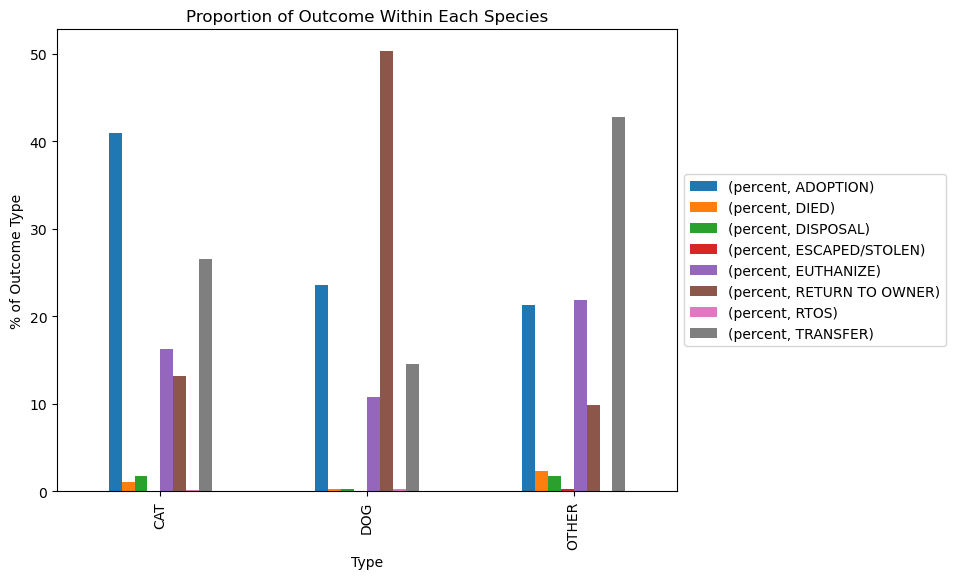

In [11]:
Image(filename = 'figures/Proportion_of_Outcome_Within_Each_Species.png', width=800, height=800)

Adoption was the most common outcome for cats at 41%. Half of the dogs in the shelter are being returned to owner, whereas most of the other species (43%) are being transferred. 

### Shelter Performance

In this section, we display shelter performance based on Adoption rate, Transfer rate, Return-to-owner rate, and Euthanasia Rate.

The overall rates for each species and outcome type throughout all years:

In [12]:
with open('computation_results/' + 'rates_df.pickle', 'rb') as f:
    rates_by_outcome = pickle.load(f)
rates_by_outcome

percent                                                \
Outcome Type   ADOPTION      DIED  DISPOSAL ESCAPED/STOLEN  EUTHANIZE   
Type                                                                    
CAT           40.948276  1.020871  1.780853       0.079401  16.254537   
DOG           23.600172  0.214807  0.250609       0.035801  10.826292   
OTHER         21.273445  2.270484  1.727542       0.246792  21.816387   

                                                   
Outcome Type RETURN TO OWNER      RTOS   TRANSFER  
Type                                               
CAT                13.214610  0.124773  26.576679  
DOG                50.250609  0.264929  14.556781  
OTHER               9.871668       NaN  42.793682

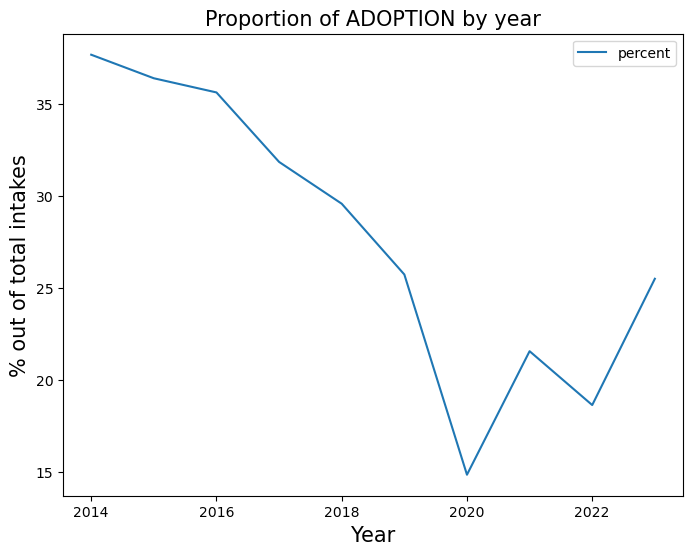

In [13]:
Image(filename = 'figures/Proportion_of_ADOPTION_by_Year.png', width=600, height=600)

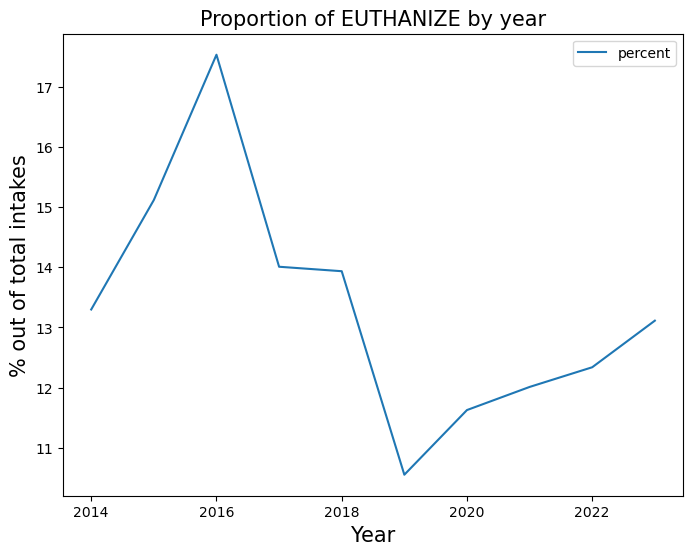

In [14]:
Image(filename = 'figures/Proportion_of_EUTHANIZE_by_Year.png', width=600, height=600)

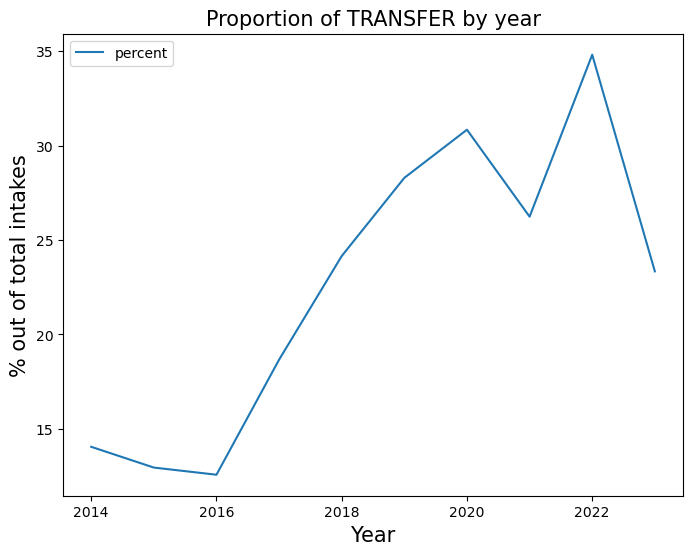

In [15]:
Image(filename = 'figures/Proportion_of_TRANSFER_by_Year.png', width=600, height=600)

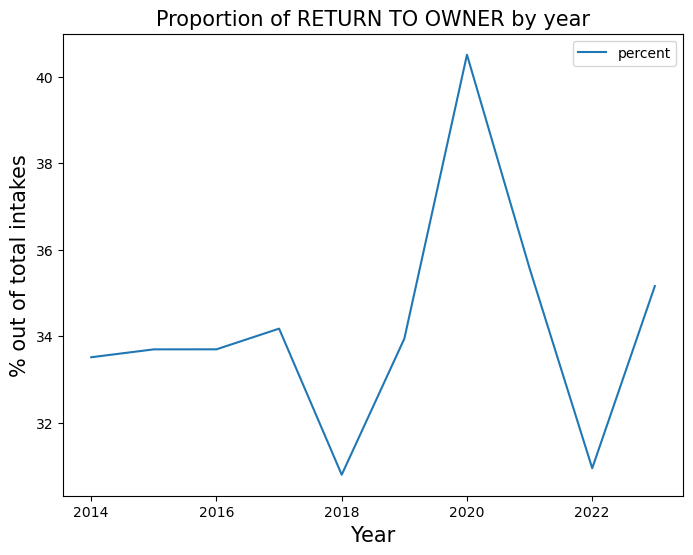

In [16]:
Image(filename = 'figures/Proportion_of_RETURN TO OWNER_by_Year.png', width=600, height=600)

Upon analyzing the above graphs, it is evident that both the adoption rates and euthanize rates exhibit a declining trend over the years, which aligns with our previous assumption regarding the onset of the COVID-19 pandemic. Specifically, the proportion of adoptions reached its lowest peak in 2020, accounting for approximately 15% of the outcomes, while the proportion of euthanizations hit its lowest peak in 2019, representing around 6% of the outcomes. These two years were heavily influenced by the impact of COVID-19. Conversely, the proportion of animal transfers to other shelters displayed an increasing trend over the years and reached its highest peak in 2022, comprising approximately 35% of the outcomes. Additionally, the proportion of animals returned to their owners reached its highest peak in 2020, accounting for around 41% of the outcomes. 

## Modeling

### Will this Animal be Adopted?

We employed logistic regression models to examine the likelihood of an animal being adopted. The aim of this analysis was to develop a predictive model that could be utilized to identify animals with a lower probability of adoption, allowing for prioritized efforts to optimize euthanize rates at the shelter. The model utilized input features such as animal types, sex, size, intake type, and intake condition. The performance of our model was respectable, achieving an accuracy of 83%, a true positive rate (TPR) of 63%, a false positive rate (FPR) of 9%, and a receiver operating characteristic area under the curve (ROC-AUC) score of 0.91. In the future, we intend to enhance the model by incorporating additional potential features and further investigate the factors that contribute to the challenges faced by certain animals in finding adoptive homes.

### How Many Days Before Adoption?

We employed the CatBoost machine learning algorithm to predict the number of days before adoption, but unfortunately, the model did not yield satisfactory results. Despite transforming the target values to address the exponential distribution, the model's performance remained subpar. The root mean squared error (RMSE) for the predictions was 22.6 days, and the R-squared value, which measures the goodness of fit, was relatively low at 0.36.

However, the feature importances provided by CatBoost proved to be valuable. They revealed that Age and Intake Year were the top two most influential features in the regression analysis. These insights highlight the importance of considering the age of the animals and the year they were taken into the shelter when predicting the time to adoption.

## Conclusions

Our model predicting whether or not an animal will be adopted performed adequately. It achieved an accuracy of 83%, true positive rate of 63%, and a 9% false positive rate when using a standard 0.5 decision boundary. The ROC-AUC score was 0.91. When plotting the precision and recall rates using different decision boundaries, both lines intersected around 72%

Our model predicting the number of days before adoption did not perform very well. We transformed the target values as it followed an exponential distribution, but the model still did not perform very well. The RMSE was 22.6 days, and the R squared value was quite low, at 0.36.

But the feature importances for the CatBoost were help. It tells us that Age and Intake yere were the top 2 most important features when performing the regression.

## Author Contributions

Florence Thin : worked on EDA and analysis of outcome, Makefile, environment, and Binder

Michelle Lin: worked on EDA and statistical model, testing, LICENSE, organizing file structure, JupyterBook structure

Sarah Song: worked on EDA and statistical model, JupyterBook, Continuous deployment, README